# Tuning the RL hyperparameters using Optuna

The script `hyperparams.py` runs hyperparameter tuning on the RL agent using Optuna. It optimizes both the RL training algorithm type (A2C or PPO), hyperparameters for the chosen RL trainining algo, and our own hyperparameters for the ns-3 environment (such as whether to randomize initial base station settings, and the number of history steps to include in the agent's observation frame). This notebook plots the results generated by `hyperparams.py`, as stored in `hyperparams.db` by Optuna.

In [1]:
import optuna
import optuna.visualization.matplotlib as viz
import matplotlib.pyplot as plt
import json
import warnings
warnings.filterwarnings('ignore', r'.*plot_.* is experimental.*')

In [2]:
study = optuna.load_study('rl', 'sqlite:///hyperparams.db')

## Achieved performance over time

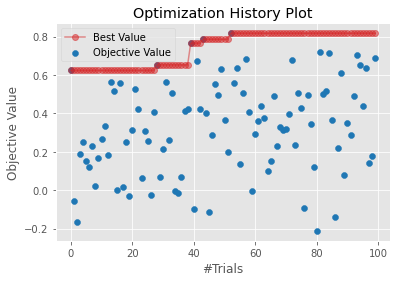

In [3]:
ymin, ymax = None, None
viz.plot_optimization_history(study).set_ylim(ymin=ymin, ymax=ymax);

## Important hyperparameters and their values for the best trial

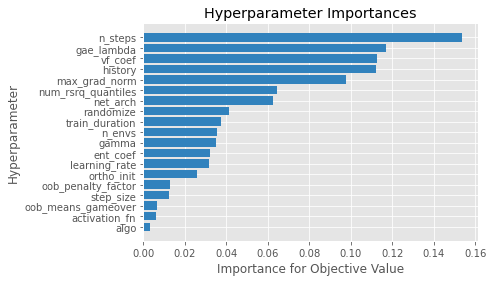

In [4]:
viz.plot_param_importances(study);

In [5]:
print(json.dumps(study.best_params, indent=4))

{
    "activation_fn": "relu",
    "algo": "ppo",
    "batch_size": 128,
    "clip_range": 0.2,
    "ent_coef": 0.0009257457647848233,
    "gae_lambda": 0.95,
    "gamma": 0.98,
    "history": 17,
    "learning_rate": 3.435506361220293e-05,
    "max_grad_norm": 1,
    "n_envs": 8,
    "n_epochs": 20,
    "n_steps": 512,
    "net_arch": "medium",
    "num_rsrq_quantiles": 1,
    "oob_means_gameover": true,
    "oob_penalty_factor": 1.0,
    "ortho_init": false,
    "randomize": true,
    "step_size": 3,
    "train_duration": 10000,
    "vf_coef": 0.2586217970201859
}


## Plotting performance as a function of each of the hyperparameters
#### _Darker dots indicate later trials, i.e. parts of the hyperparameter space deemed more attractive by Optuna_

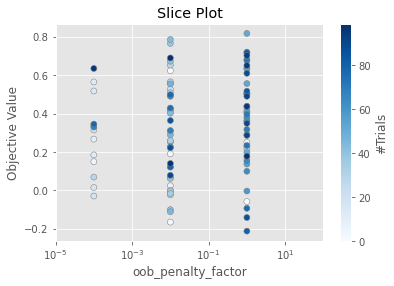

In [6]:
ax = viz.plot_slice(study, ['oob_penalty_factor'])
ax.set_xscale('log')
ax.set_xlim(xmin=1e-5, xmax=1e2)
ax.set_ylim(ymin=ymin, ymax=ymax);

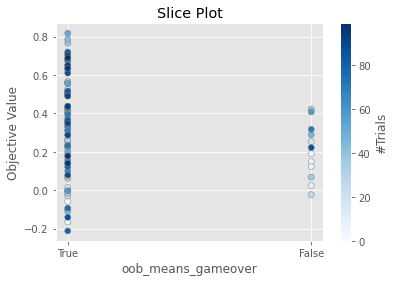

In [7]:
viz.plot_slice(study, ['oob_means_gameover']).set_ylim(ymin=ymin, ymax=ymax);

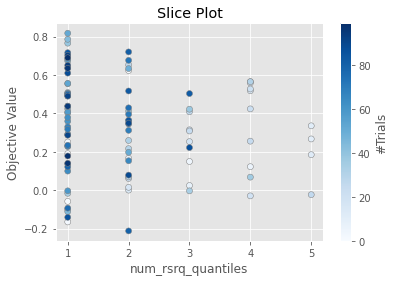

In [8]:
viz.plot_slice(study, ['num_rsrq_quantiles']).set_ylim(ymin=ymin, ymax=ymax);

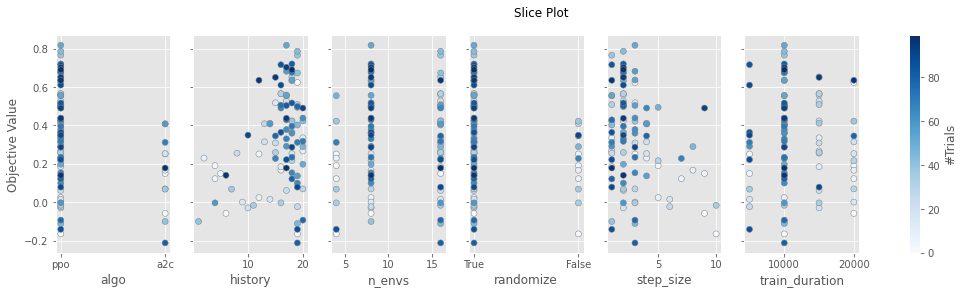

In [9]:
viz.plot_slice(study, ['algo','randomize','n_envs','history','train_duration','step_size'])[0].set_ylim(ymin=ymin, ymax=ymax);

### Hyperparameters common to A2C and PPO training

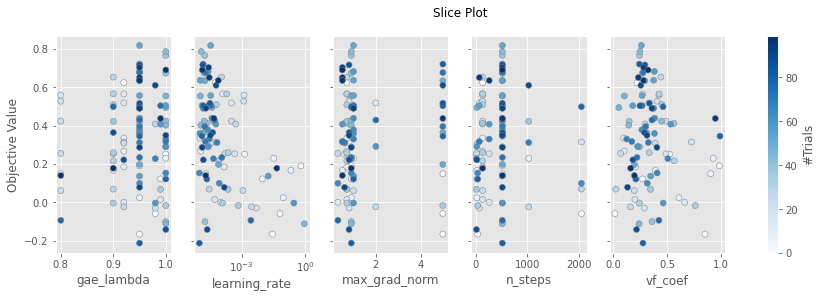

In [10]:
viz.plot_slice(study, ['vf_coef','max_grad_norm','gae_lambda','learning_rate','n_steps'])[0].set_ylim(ymin=ymin, ymax=ymax);

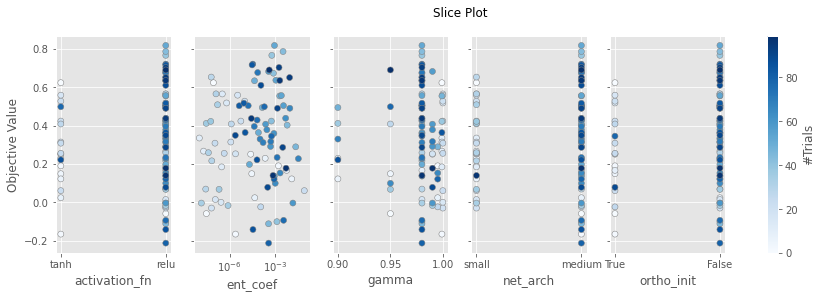

In [11]:
viz.plot_slice(study, ['gamma','net_arch','activation_fn','ent_coef','ortho_init'])[0].set_ylim(ymin=ymin, ymax=ymax);

### Hyperparameters only used for A2C

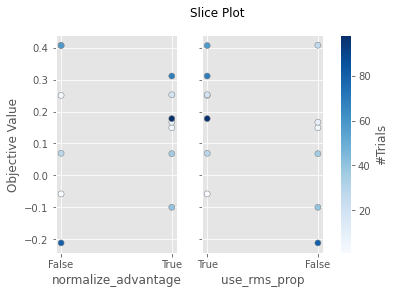

In [12]:
viz.plot_slice(study, ['normalize_advantage','use_rms_prop'])[0].set_ylim(ymin=ymin, ymax=ymax);

### Hyperparameters only used for PPO

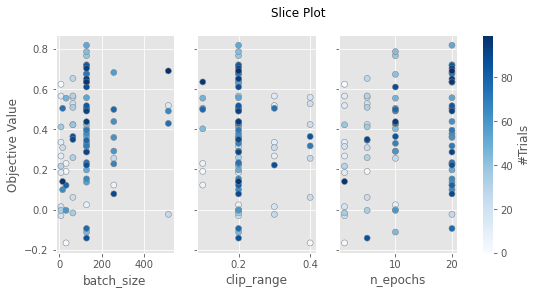

In [13]:
viz.plot_slice(study, ['batch_size','clip_range','n_epochs'])[0].set_ylim(ymin=ymin, ymax=ymax);

## Plotting some hyperparameter values as a function of time
#### _As the hyperparameter tuning progresses, we see which values are deemed more attractive by Optuna_

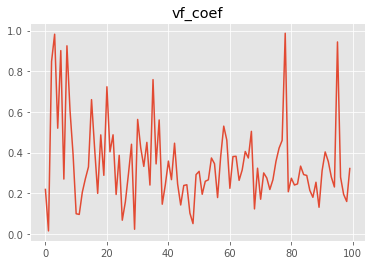

In [14]:
study.trials_dataframe()['params_vf_coef'].plot(title='vf_coef');

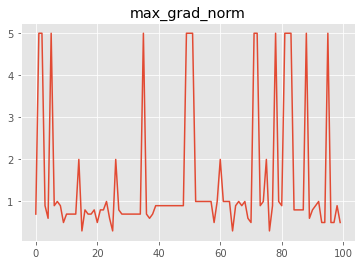

In [15]:
study.trials_dataframe()['params_max_grad_norm'].plot(title='max_grad_norm');

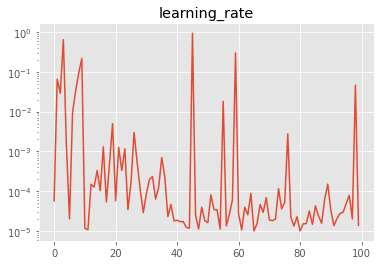

In [16]:
study.trials_dataframe()['params_learning_rate'].plot(title='learning_rate', logy=True);

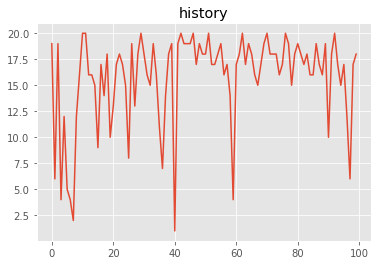

In [17]:
study.trials_dataframe()['params_history'].plot(title='history');